<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2025-01-24 to 2020-01-27
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1257 non-null   float64
 1   Open      1257 non-null   float64
 2   High      1257 non-null   float64
 3   Low       1257 non-null   float64
 4   Vol.      1257 non-null   object 
 5   Change %  1257 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.7+ KB
None
             Price    Open    High     Low    Vol. Change %
Date                                                       
2025-01-24  133.22  133.47  134.33  132.50  32.71K   -1.51%
2025-01-23  135.26  133.15  135.48  132.46  42.49K    0.72%
2025-01-22  134.29  135.30  135.68  134.07  54.70K    1.57%
2025-01-21  132.22  126.02  132.22  125.66  72.43K    6.59%
2025-01-17  124.05  124.31  125.37  123.97  19.02K   -0.56%


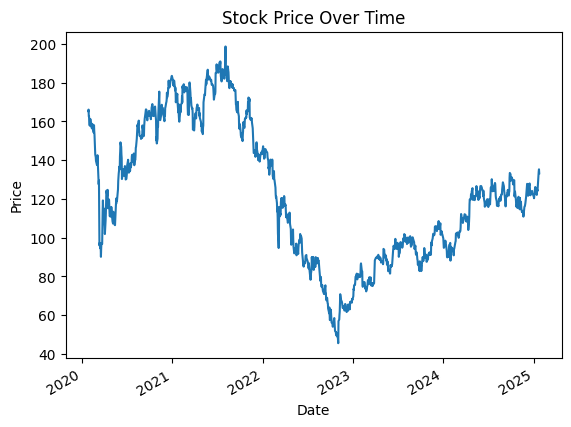

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Specify the file path (update the path as needed)
file_path = './data/Adidas_ADR_Stock_Price_History.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Rename the "Unnamed: 0" column to "Date"
    df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

    # Convert the 'Date' column to datetime (with the correct format)
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Update format

    # Set the 'Date' column as the index of the DataFrame
    df.set_index('Date', inplace=True)

    # Check the data structure after modifications
    print(df.info())
    print(df.head())

    # Plotting the "Price" column over time
    df['Price'].plot(title='Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

else:
    print(f"File not found: {file_path}")


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data path
file_path = './data/Adidas_ADR_Stock_Price_History.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={'Vol.': 'Volume'}, inplace=True)

# Convert 'Date' column to datetime (in the format 'dd/mm/yyyy')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Ensure columns are in the desired format
# Remove the '%' from 'Change %' and convert it to numeric (if needed)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

# Clean 'Volume' column
# Remove 'K', 'M' and any other non-numeric characters, then convert to float
df['Volume'] = df['Volume'].str.replace('K', '').str.replace('M', '').str.replace(',', '')

# Convert volume to float, handling the magnitude (K = thousand, M = million)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# If 'Volume' was in thousands (as in "32.71K"), multiply by 1000 to get the correct value
df['Volume'] = df['Volume'].apply(lambda x: x * 1000 if 'K' in str(x) else x * 1000000 if 'M' in str(x) else x)

# For simplicity, you can keep the column names you want:
# Select the relevant columns (Open, High, Low, Close, Volume)
df = df[['Date', 'Open', 'High', 'Low', 'Price', 'Volume']]

# Optionally, you can rename 'Price' to 'Close' for the final structure
df.rename(columns={'Price': 'Close'}, inplace=True)

# Apply MinMaxScaler to normalize numerical columns
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Now, save or work with the final preprocessed dataframe
# Print the first few rows to check the data
print(df.head())

        Date      Open      High       Low     Close    Volume
0 2025-01-24  0.581252  0.574333  0.577056  0.572660  0.037650
1 2025-01-23  0.579132  0.581851  0.576790  0.585977  0.049288
2 2025-01-22  0.593375  0.583159  0.587467  0.579645  0.063817
3 2025-01-21  0.531898  0.560539  0.531698  0.566131  0.084915
4 2025-01-17  0.520570  0.515756  0.520491  0.512795  0.021360


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])


In [18]:
df['5_day_MA'] = df['Close'].rolling(window=5).mean()
df['20_day_MA'] = df['Close'].rolling(window=20).mean()

In [19]:
df['Price Change'] = df['Close'].pct_change()  # Daily percent change

In [21]:
df.to_csv('processed_Adidas_ADR_Stock_price_data.csv')